# 3D file tutorial (.mha)

In [20]:
import SimpleITK as sitk
import torch
import numpy as np
import os

파일 경로 정의

In [21]:
# 사용할 .mha 파일 경로
file_path = os.path.expanduser('~/mha/files/2ABA002/cbct.mha')

SimpleITK 라이브러리를 이용해서 .mha 파일 읽기

In [22]:
sitk_image = sitk.ReadImage(file_path)

type(sitk_image)

SimpleITK.SimpleITK.Image

SimpleITK 객체를 numpy 객체로 변환

In [23]:
# SimpleITK 이미지를 NumPy 배열로 변환
# GetArrayFromImage는 축 순서를 (Depth, Height, Width) [z, y, x]로 변환
numpy_array = sitk.GetArrayFromImage(sitk_image)

# 데이터 타입 변환
# 원본 이미지 데이터 타입을 딥러닝 모델이 input의 type으로 자주 사용하는 float32로 변환(명시)
numpy_array = numpy_array.astype(np.float32)

numpy 배열을 tensor(pytorch)로 변환

In [24]:
# NumPy 배열을 PyTorch 텐서로 변환
tensor = torch.from_numpy(numpy_array)

# 딥러닝 모델 입력을 위한 차원 추가
# 현재 텐서 shape: (D, H, W)
# 주로 3D 딥러닝 모델은 (Batch, Channel, D, H, W) 입력을 받음

# 채널(C) 차원 추가
tensor = tensor.unsqueeze(0)  # shape: (1, D, H, W)
# 배치(N) 차원 추가
tensor = tensor.unsqueeze(0)  # shape: (1, 1, D, H, W)


# --- 결과 확인 ---
print(f"SITK 원본 이미지 크기 (x, y, z): {sitk_image.GetSize()}")
print(f"NumPy 배열 shape (z, y, x): {numpy_array.shape}")
print(f"최종 텐서 shape (N, C, D, H, W): {tensor.shape}")
print(f"텐서 데이터 타입: {tensor.dtype}")

SITK 원본 이미지 크기 (x, y, z): (310, 309, 88)
NumPy 배열 shape (z, y, x): (88, 309, 310)
최종 텐서 shape (N, C, D, H, W): torch.Size([1, 1, 88, 309, 310])
텐서 데이터 타입: torch.float32


시각화

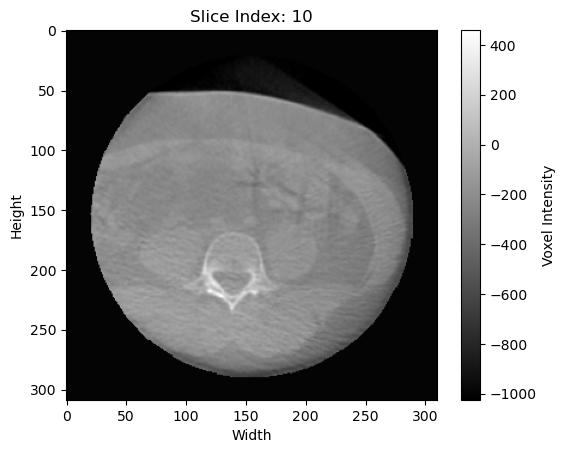

In [ ]:
import matplotlib.pyplot as plt

# 확인하고 싶은 슬라이스의 인덱스 선택
# (예: 120장 중 절반인 60번째 슬라이스 확인)
slice_index = 10

# 텐서에서 해당 슬라이스 추출 (NumPy처럼 인덱싱)
# 첫 번째 배치(0)의, 첫 번째 채널(0)의, 60번째 슬라이스(slice_index)를 선택
# 이 슬라이스의 shape는 (H, W)가 됨
slice_tensor = tensor[0, 0, slice_index]

# 시각화를 위해 텐서를 NumPy 배열로 변환
## .cpu(): 텐서가 GPU(cuda)에 있다면 CPU로 먼저 이동
## .detach(): 텐서가 gradient를 가졌다면(autograd 추적 중), 추적을 멈춰야 .numpy() 변환 가능
## .numpy(): CPU 텐서를 NumPy 배열로 변환
slice_numpy = slice_tensor.cpu().detach().numpy()

# (TensorFlow의 경우 간단히 .numpy()만 호출해도 CPU로 복사됨)
# slice_numpy = slice_tensor.numpy() 

# 시각화
plt.imshow(slice_numpy, cmap='gray')
plt.title(f"Slice Index: {slice_index}")
plt.colorbar(label='Voxel Intensity')
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()